In [1]:
from backend.daps.data import Devices, Speakers
from backend.daps.loader import DAPSLoader
from backend.audio_to_spectrogram_converter import AudioToSpectrogramConverter
from backend.tsrc.loader import TSRCLoader
from backend.tsrc.data import Environments

%load_ext autoreload
%autoreload 2

In [2]:
import PIL
from IPython.display import Audio
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
from ipywidgets import widgets
from ipywidgets import interactive

In [1]:
#audio_data = DAPSLoader('../data/daps').get_audio(devices=[Devices.ipad], speakers=[Speakers.f1])
#AudioToSpectrogramConverter().convert(audio_data[0]).show()

In [56]:
audio_data = TSRCLoader('../data/tsrc').get_audio([Environments.cat, Environments.dog, Environments.bed, Environments.bird, Environments.down, Environments.eight])

In [57]:
enviroment_counts = {}
tag_list = []
sample_len_list = []
sample_rate_list = []
speaker_id_list = []
repetition_no_list = []


for audio in audio_data:
    tag_list.append(audio.tag)
    sample_len_list.append(len(audio.samples))
    sample_rate_list.append(audio.sample_rate)
    speaker_id_list.append(audio.speaker_id)
    repetition_no_list.append(audio.repetition_no)

In [58]:
df = pd.DataFrame({"tag": tag_list, 
                   "sample_len": sample_len_list, 
                   "sample_rate": sample_rate_list, 
                   "speaker_id": speaker_id_list,
                   "repetition_no" : repetition_no_list})
df['audio_length'] = df['sample_len'] / df['sample_rate']

<div style="text-align:center;
            font-size:30px;
            border-bottom:solid">
    Length of audio clips
    </div>

In [11]:
tag_widget = widgets.Dropdown(
    options=['All'] + list(df['tag'].unique()),
    value='All',
    description='tag:',
)

def plot_length(tag):
    df2 = df.copy()
    if tag != 'All':
        df2 = df2[df2.tag == tag]

    # Plot it (only if there's data to plot)
    if len(df2) > 0:
        sns.violinplot(df2, x = "tag", y="audio_length").set_title("Length of audio by tag")
        plt.show();
    else:
        print("No data to show for current selection")

In [59]:
tag_widget = widgets.SelectMultiple(
    options=list(df['tag'].unique()),
    value=list(df['tag'].unique()),
    #rows=10,
    description='tag'
)

def plot_length(tag):
    df2 = df.copy()
    df2 = df2[df2.tag.isin(tag)]

    # Plot it (only if there's data to plot)
    if len(df2) > 0:
        sns.violinplot(df2, x = "tag", y="audio_length").set_title("Length of audio by tag")
        plt.show();
    else:
        print("No data to show for current selection")

In [63]:
sns.set_theme(rc={'figure.figsize':(21.7,8.27)})

In [64]:
interactive(plot_length, tag = tag_widget)

interactive(children=(SelectMultiple(description='tag', index=(3, 4, 5), options=('cat', 'dog', 'bed', 'bird',…

In [14]:
def plot_length_hist(tag):
    df2 = df.copy()
    df2['audio_length'] = df2['audio_length'].round(3)
    if tag != 'All':
        df2 = df2[df2.tag == tag]

    # Plot it (only if there's data to plot)
    if len(df2) > 0:
        sns.histplot(df2,x="audio_length").set_title("Length of audio by tag")
        plt.show();
    else:
        print("No data to show for current selection")

In [15]:
interactive(plot_length_hist, tag = tag_widget)

interactive(children=(Dropdown(description='tag:', options=('All', 'cat', 'dog'), value='All'), Output()), _do…

<div style="text-align:center;
            font-size:30px;
            border-bottom:solid">
    Class size
    </div>

<Axes: xlabel='tag', ylabel='count'>

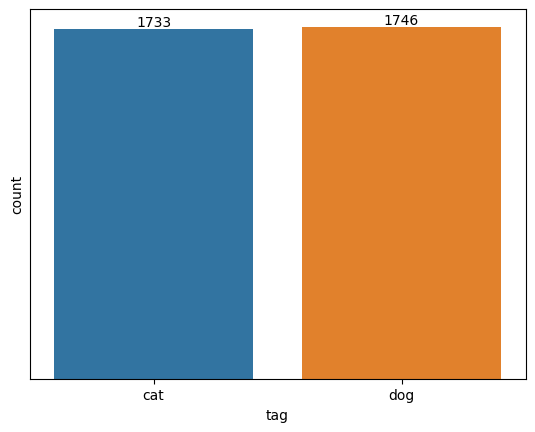

In [29]:
count_df = df.groupby("tag", as_index=False).agg(count=('tag', 'count'))

ax = sns.barplot(count_df, x="tag", y="count")
ax.bar_label(ax.containers[0])
ax.set_yticks([], [])
ax

<div style="text-align:center;
            font-size:30px;
            border-bottom:solid">
    Class size
    </div>

In [33]:
df

,tag,sample_len,sample_rate,speaker_id,repetition_no,audio_length
0,cat,22050,22050,004ae714,0,1.000000
1,cat,15361,22050,004ae714,1,0.696644
2,cat,22050,22050,00b01445,0,1.000000
3,cat,22050,22050,00f0204f,0,1.000000
4,cat,22050,22050,00f0204f,1,1.000000
...,...,...,...,...,...,...
3474,dog,22050,22050,ff63ab0b,1,1.000000
3475,dog,22050,22050,ffb86d3c,0,1.000000
3476,dog,22050,22050,ffb86d3c,1,1.000000
3477,dog,22050,22050,ffbb695d,0,1.000000


<div style="text-align:center;
            font-size:30px;
            border-bottom:solid">
    Repetitions of speakers
    </div>

In [49]:
def plot_repetitions(tag):
    df2 = df.copy()
    df2 = (
        df2
        .groupby(["speaker_id", "tag"], as_index=False)
        .agg(no_repetitions=('tag', 'count'))
        .groupby(["tag", "no_repetitions"], as_index=False)
        .agg(count=('no_repetitions', 'sum'))
    )
    if tag != 'All':
        df2 = df2[df2.tag == tag]
    else:
        df2 = (
            df2
            .groupby(["no_repetitions"], as_index=False)
            .agg(count=('count', 'sum'))
        )

    # Plot it (only if there's data to plot)
    if len(df2) > 0:
        sns.barplot(df2,x="no_repetitions", y="count").set_title("Length of audio by tag")
        plt.show();
    else:
        print("No data to show for current selection")

In [51]:
interactive(plot_repetitions, tag = tag_widget)

interactive(children=(Dropdown(description='tag:', options=('All', 'cat', 'dog'), value='All'), Output()), _do…

<div style="text-align:center;
            font-size:30px;
            border-bottom:solid">
    Mean spectrogram
    </div>

<div style="text-align:center;
            font-size:30px;
            border-bottom:solid">
    Mean length of each word
    </div>

<div style="text-align:center;
            font-size:30px;
            border-bottom:solid">
    Distribution of length of each word
    </div>

<div style="text-align:center;
            font-size:30px;
            border-bottom:solid">
    Log of spectrogram
    </div>

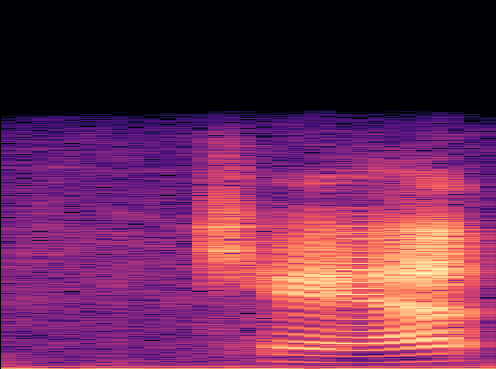

tag: cat
size: (496, 369)


In [44]:
i = 1
my_image_mem = AudioToSpectrogramConverter().convert_to_bytes(audio_data[i], dpi=100)
my_image = PIL.Image.open(my_image_mem)
display(my_image)
print(f"tag: {audio_data[i].tag}")
print(f"size: {my_image.size}")

In [67]:
Audio(audio_data[5].samples, rate=audio_data[5].sample_rate)